In [1]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Importing the dataset
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, 1].values
print(dataset)

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


In [3]:
#Splitting dataset into training set and test set
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0)

C:\Users\Raghav\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
def update_weights(x, y, m, b, learning_rate):
    m_deriv = 0
    b_deriv = 0
    l = len(x)

    for i in range(l):
        # Calculate partial derivatives
        # -2x(y - (mx + b))
        m_deriv += -2*x[i] * (y[i] - (m*x[i] + b))

        # -2(y - (mx + b))
        b_deriv += -2*(y[i] - (m*x[i] + b))

    # We subtract because the derivatives point in direction of steepest ascent
    m -= (m_deriv / l) * learning_rate
    b -= (b_deriv / l) * learning_rate

    return m, b

In [5]:
def train(x, y, m, b, learning_rate, iters):

    for i in range(iters):
        m,b = update_weights(x, y, m, b, learning_rate)

    return m, b

In [6]:
m,b = train(X_train, Y_train, 0, 0, 0.0005, 10000)

In [7]:
print(m)
print(b)

[9812.54231739]
[23998.80152492]


In [8]:
y_pred = m * X_test + b

In [9]:
print(y_pred)

[[ 38717.615001  ]
 [125067.98739401]
 [ 64230.22502621]
 [ 62267.71656273]
 [117217.9535401 ]
 [109367.91968619]
 [118199.20777184]
 [ 63248.97079447]
 [ 76005.27580707]
 [101517.88583228]]


In [10]:
print(Y_test)

[ 37731. 122391.  57081.  63218. 116969. 109431. 112635.  55794.  83088.
 101302.]


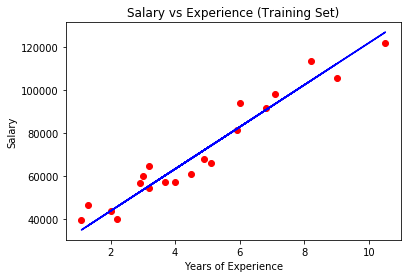

In [11]:
#Visualizing the Training set results
plt.scatter(X_train, Y_train, color = 'red' )
plt.plot(X_train, m*X_train+b, color = 'blue')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

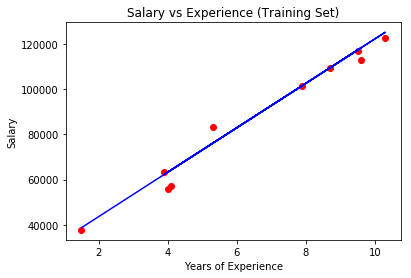

In [12]:
#Visualizing the Test set results
plt.scatter(X_test, Y_test, color = 'red' )
plt.plot(X_test, y_pred, color = 'blue')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [13]:
err = 0
l = len(Y_test)
for i in range(l):
    err+=(y_pred[i]-Y_test[i])**2
err = err/l
err = int(err**0.5)
print(err)

4438


In [14]:
def rmse(predictions, targets):

    differences = predictions - targets                       #the DIFFERENCEs.

    differences_squared = differences ** 2                    #the SQUAREs of ^

    mean_of_differences_squared = differences_squared.mean()  #the MEAN of ^

    rmse_val = mean_of_differences_squared**0.5           #ROOT of ^

    return rmse_val 
rmse = rmse(np.array(y_pred), np.array(Y_test))
print(rmse)

40740.65664595313


In [15]:
from sklearn.metrics import mean_squared_error,r2_score

In [16]:
r2 = r2_score(Y_test, y_pred)

In [17]:
print(r2)

0.9765011722408276


In [20]:
n = 10
k = 1
adj_r2 = 1-(((1-r2)*(n-1))/(n-k-1))
print(adj_r2)

0.973563818770931
